In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [3]:
df = pd.read_csv("loan_data_v3.csv")

In [4]:
df.head()

,Unnamed: 0,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,4847,26.0,male,Associate,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,13802,22.0,female,Bachelor,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,39763,25.0,female,High School,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,39215,31.0,female,Master,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,26369,33.0,female,Associate,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [5]:
df.drop(columns=["Unnamed: 0"], axis=1, inplace=True)

In [6]:
df["person_gender"].unique()

array(['male', 'female', nan], dtype=object)

In [7]:
df["person_gender"] = df["person_gender"].map({"male": 0, "female": 1})

In [8]:
df["person_education"].unique()

array(['Associate', 'Bachelor', 'High School', 'Master', nan, 'Doctorate'],
      dtype=object)

In [9]:
categories = [
    'High School',
    'Associate',
    'Bachelor',
    'Master',
    'Doctorate',
]

encoder = OrdinalEncoder(categories=[categories], handle_unknown="use_encoded_value", unknown_value=np.nan)
df[["person_education"]] = encoder.fit_transform(df[["person_education"]])

In [10]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,26.0,0.0,1.0,43996.0,4,RENT,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0
1,22.0,1.0,2.0,115708.0,0,MORTGAGE,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0
2,25.0,1.0,0.0,57827.0,0,RENT,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0
3,31.0,1.0,3.0,126727.0,9,RENT,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0
4,33.0,1.0,1.0,120987.0,10,OWN,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0


In [11]:
df["person_home_ownership"].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [12]:
df = pd.concat([df, pd.get_dummies(df["person_home_ownership"])], axis=1)
df.drop(columns=["person_home_ownership"], axis=1, inplace=True)

In [13]:
df["loan_intent"].unique()

array(['VENTURE', 'EDUCATION', 'PERSONAL', 'DEBTCONSOLIDATION', 'MEDICAL',
       'HOMEIMPROVEMENT'], dtype=object)

In [14]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OTHER,OWN,RENT
0,26.0,0.0,1.0,43996.0,4,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0,False,False,False,True
1,22.0,1.0,2.0,115708.0,0,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0,True,False,False,False
2,25.0,1.0,0.0,57827.0,0,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0,False,False,False,True
3,31.0,1.0,3.0,126727.0,9,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0,False,False,False,True
4,33.0,1.0,1.0,120987.0,10,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,31.0,1.0,3.0,67104.0,11,8000.0,PERSONAL,7.51,0.12,8.0,670.0,No,NaN,False,False,True,False
7996,NaN,1.0,1.0,31137.0,0,NaN,MEDICAL,14.23,0.08,3.0,569.0,Yes,0.0,False,False,False,True
7997,29.0,1.0,2.0,45535.0,7,3000.0,DEBTCONSOLIDATION,19.29,0.07,5.0,NaN,No,1.0,False,False,False,True
7998,24.0,1.0,NaN,57558.0,3,12000.0,MEDICAL,12.21,0.21,3.0,553.0,Yes,0.0,True,False,False,False


In [15]:
df.isnull().sum()

person_age                        488
person_gender                     294
person_education                  422
person_income                       0
person_emp_exp                      0
loan_amnt                         336
loan_intent                         0
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      522
previous_loan_defaults_on_file      0
loan_status                       250
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
dtype: int64

In [16]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,MORTGAGE,OTHER,OWN,RENT
0,26.0,0.0,1.0,43996.0,4,5000.0,VENTURE,10.37,0.11,4.0,675.0,No,0.0,False,False,False,True
1,22.0,1.0,2.0,115708.0,0,20000.0,EDUCATION,7.88,0.17,3.0,635.0,No,0.0,True,False,False,False
2,25.0,1.0,0.0,57827.0,0,6000.0,PERSONAL,11.60,0.10,4.0,589.0,Yes,0.0,False,False,False,True
3,31.0,1.0,3.0,126727.0,9,24000.0,DEBTCONSOLIDATION,10.27,0.19,7.0,644.0,Yes,0.0,False,False,False,True
4,33.0,1.0,1.0,120987.0,10,25000.0,MEDICAL,12.18,0.21,10.0,644.0,Yes,0.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,31.0,1.0,3.0,67104.0,11,8000.0,PERSONAL,7.51,0.12,8.0,670.0,No,NaN,False,False,True,False
7996,NaN,1.0,1.0,31137.0,0,NaN,MEDICAL,14.23,0.08,3.0,569.0,Yes,0.0,False,False,False,True
7997,29.0,1.0,2.0,45535.0,7,3000.0,DEBTCONSOLIDATION,19.29,0.07,5.0,NaN,No,1.0,False,False,False,True
7998,24.0,1.0,NaN,57558.0,3,12000.0,MEDICAL,12.21,0.21,3.0,553.0,Yes,0.0,True,False,False,False


In [17]:
df["loan_intent"].unique()

array(['VENTURE', 'EDUCATION', 'PERSONAL', 'DEBTCONSOLIDATION', 'MEDICAL',
       'HOMEIMPROVEMENT'], dtype=object)

In [18]:
df = pd.concat([df, pd.get_dummies(df["loan_intent"])], axis=1)
df.drop(columns=["loan_intent"], axis=1, inplace=True)

In [19]:
df.dropna(subset=["loan_status"], inplace=True)

In [20]:
df.isnull().sum()

person_age                        475
person_gender                     289
person_education                  409
person_income                       0
person_emp_exp                      0
loan_amnt                         326
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                      504
previous_loan_defaults_on_file      0
loan_status                         0
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
DEBTCONSOLIDATION                   0
EDUCATION                           0
HOMEIMPROVEMENT                     0
MEDICAL                             0
PERSONAL                            0
VENTURE                             0
dtype: int64

In [21]:
df['credit_score'] = df['credit_score'].fillna(df['credit_score'].mean())

In [22]:
df.isnull().sum()

person_age                        475
person_gender                     289
person_education                  409
person_income                       0
person_emp_exp                      0
loan_amnt                         326
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                         0
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
DEBTCONSOLIDATION                   0
EDUCATION                           0
HOMEIMPROVEMENT                     0
MEDICAL                             0
PERSONAL                            0
VENTURE                             0
dtype: int64

In [23]:
df["person_age"] = df["person_age"].fillna(df["person_age"].mean())

In [24]:
df["person_gender"].value_counts()

person_gender
0.0    4134
1.0    3327
Name: count, dtype: int64

In [25]:
df["person_gender"] = df["person_gender"].fillna(df["person_gender"].mode()[0])

<Axes: >

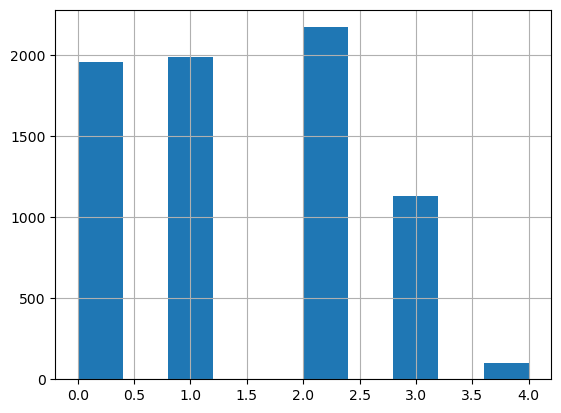

In [26]:
df["person_education"].hist()

In [27]:
df["person_education"] = df["person_education"].fillna(df["person_education"].mode()[0])

In [28]:
df.isnull().sum()

person_age                          0
person_gender                       0
person_education                    0
person_income                       0
person_emp_exp                      0
loan_amnt                         326
loan_int_rate                       0
loan_percent_income                 0
cb_person_cred_hist_length          0
credit_score                        0
previous_loan_defaults_on_file      0
loan_status                         0
MORTGAGE                            0
OTHER                               0
OWN                                 0
RENT                                0
DEBTCONSOLIDATION                   0
EDUCATION                           0
HOMEIMPROVEMENT                     0
MEDICAL                             0
PERSONAL                            0
VENTURE                             0
dtype: int64

In [29]:
df["loan_amnt"].unique()

array([ 5000., 20000.,  6000., ...,  6725., 18995.,  3596.])

<Axes: >

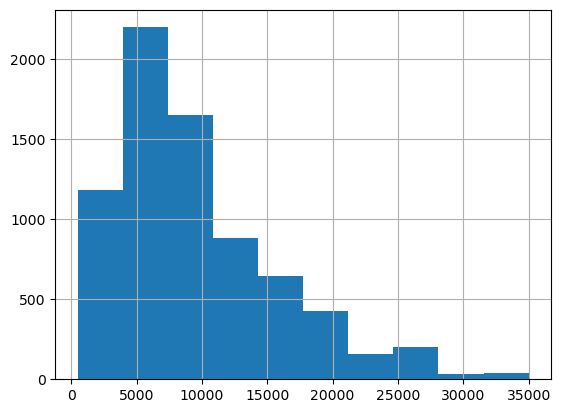

In [30]:
df["loan_amnt"].hist()

In [31]:
df['loan_amnt'] = df['loan_amnt'].fillna(df['loan_amnt'].median())

In [32]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
loan_amnt                         0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
MORTGAGE                          0
OTHER                             0
OWN                               0
RENT                              0
DEBTCONSOLIDATION                 0
EDUCATION                         0
HOMEIMPROVEMENT                   0
MEDICAL                           0
PERSONAL                          0
VENTURE                           0
dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   float64
 1   person_gender                   7750 non-null   float64
 2   person_education                7750 non-null   float64
 3   person_income                   7750 non-null   float64
 4   person_emp_exp                  7750 non-null   int64  
 5   loan_amnt                       7750 non-null   float64
 6   loan_int_rate                   7750 non-null   float64
 7   loan_percent_income             7750 non-null   float64
 8   cb_person_cred_hist_length      7750 non-null   float64
 9   credit_score                    7750 non-null   float64
 10  previous_loan_defaults_on_file  7750 non-null   object 
 11  loan_status                     7750 non-null   float64
 12  MORTGAGE                        7750 no

In [34]:
df["previous_loan_defaults_on_file"].unique()

array(['No', 'Yes'], dtype=object)

In [35]:
df["previous_loan_defaults_on_file"] = df["previous_loan_defaults_on_file"].map({"No": 0, "Yes": 1})

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7750 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      7750 non-null   float64
 1   person_gender                   7750 non-null   float64
 2   person_education                7750 non-null   float64
 3   person_income                   7750 non-null   float64
 4   person_emp_exp                  7750 non-null   int64  
 5   loan_amnt                       7750 non-null   float64
 6   loan_int_rate                   7750 non-null   float64
 7   loan_percent_income             7750 non-null   float64
 8   cb_person_cred_hist_length      7750 non-null   float64
 9   credit_score                    7750 non-null   float64
 10  previous_loan_defaults_on_file  7750 non-null   int64  
 11  loan_status                     7750 non-null   float64
 12  MORTGAGE                        7750 no

In [37]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,...,MORTGAGE,OTHER,OWN,RENT,DEBTCONSOLIDATION,EDUCATION,HOMEIMPROVEMENT,MEDICAL,PERSONAL,VENTURE
0,26.0,0.0,1.0,43996.0,4,5000.0,10.37,0.11,4.0,675.0,...,False,False,False,True,False,False,False,False,False,True
1,22.0,1.0,2.0,115708.0,0,20000.0,7.88,0.17,3.0,635.0,...,True,False,False,False,False,True,False,False,False,False
2,25.0,1.0,0.0,57827.0,0,6000.0,11.60,0.10,4.0,589.0,...,False,False,False,True,False,False,False,False,True,False
3,31.0,1.0,3.0,126727.0,9,24000.0,10.27,0.19,7.0,644.0,...,False,False,False,True,True,False,False,False,False,False
4,33.0,1.0,1.0,120987.0,10,25000.0,12.18,0.21,10.0,644.0,...,False,False,True,False,False,False,False,True,False,False


In [38]:
X, y = df.drop(columns=["loan_status"]), df["loan_status"]

In [39]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [41]:
classifier = LogisticRegression().fit(train_X, train_y)
pred_y = classifier.predict(test_X)
print(classification_report(test_y, pred_y))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      1196
         1.0       0.78      0.75      0.76       354

    accuracy                           0.89      1550
   macro avg       0.85      0.84      0.85      1550
weighted avg       0.89      0.89      0.89      1550

